In [1]:
import networkx as nx
from burn_tree import *

In [2]:
balanced_tree = nx.balanced_tree(r=2, h=5)
print(balanced_tree.nodes)
print(balanced_tree.degree(0))
print(balanced_tree.degree(62))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]
2
1


In [3]:
burning_sequence = burn_tree(balanced_tree)
print(burning_sequence)

[0, 1, 3, 7, 15, 31]


In [4]:
# Position the nodes nicely into a tree shape
pos = nx.nx_pydot.pydot_layout(balanced_tree, prog='dot')
nx.draw(balanced_tree, pos=pos, with_labels=True)

In [5]:
from graph_utils import create_adj_mat
import os
import math

# Try burning all the trees in the ./trees directory
DIR_NAME = "./trees"
directory = os.fsencode(DIR_NAME)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".mat"):
        #print(filename)
        filepath = os.path.join(DIR_NAME, filename)
        with open(filepath, 'r') as file:
            adj_mat = create_adj_mat(filepath)
            tree = nx.convert_matrix.from_numpy_matrix(adj_mat)
            #pos = nx.nx_pydot.pydot_layout(tree, prog='dot')
            #nx.draw(tree, pos=pos, with_labels=True)
            
            burning_sequence = burn_tree(tree)
            print('b(G)<={0:2d} | n={1:2d} | ceil(sqrt(n))={2:2d} | {3:15} | {4:20}'.format(len(burning_sequence),
                                                                     tree.order(),
                                                                     math.ceil(math.sqrt(tree.order())),
                                                                     filename,
                                                                     str(burning_sequence)))

b(G)<= 2 | n= 6 | ceil(sqrt(n))= 3 | cross.mat       | [5, 3]              
b(G)<= 3 | n= 8 | ceil(sqrt(n))= 3 | ethane.mat      | [0, 7, 1]           
b(G)<= 2 | n= 5 | ceil(sqrt(n))= 3 | fork.mat        | [4, 2]              
b(G)<= 5 | n=32 | ceil(sqrt(n))= 6 | graph_1028.mat  | [0, 29, 28, 22, 19] 
b(G)<= 4 | n=13 | ceil(sqrt(n))= 4 | graph_156.mat   | [0, 6, 10, 2]       
b(G)<= 3 | n=11 | ceil(sqrt(n))= 4 | graph_164.mat   | [5, 8, 3]           
b(G)<= 3 | n=11 | ceil(sqrt(n))= 4 | graph_25135.mat | [9, 8, 3]           
b(G)<= 7 | n=46 | ceil(sqrt(n))= 7 | graph_26981.mat | [41, 17, 28, 22, 13, 43, 1]
b(G)<= 3 | n=12 | ceil(sqrt(n))= 4 | graph_27412.mat | [10, 8, 5]          
b(G)<= 4 | n=16 | ceil(sqrt(n))= 4 | graph_28507.mat | [0, 14, 11, 7]      
b(G)<= 4 | n=16 | ceil(sqrt(n))= 4 | graph_30698.mat | [13, 14, 12, 2]     
b(G)<= 4 | n=12 | ceil(sqrt(n))= 4 | graph_352.mat   | [0, 7, 10, 2]       
b(G)<= 4 | n=14 | ceil(sqrt(n))= 4 | graph_356.mat   | [0, 7, 11, 3]       
b(G)<

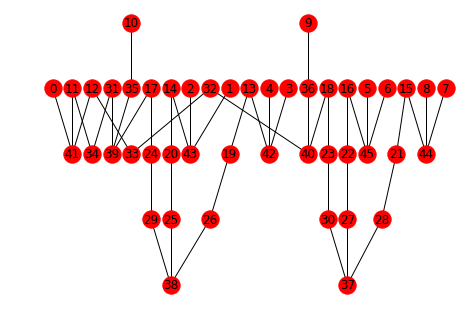

In [6]:
def show_graph(filepath):
    adj_mat = create_adj_mat(filepath)
    tree = nx.convert_matrix.from_numpy_matrix(adj_mat)
    pos = nx.nx_pydot.pydot_layout(tree, prog='dot')
    nx.draw(tree, pos=pos, with_labels=True)

filepath = './trees/graph_26981.mat'
show_graph(filepath)

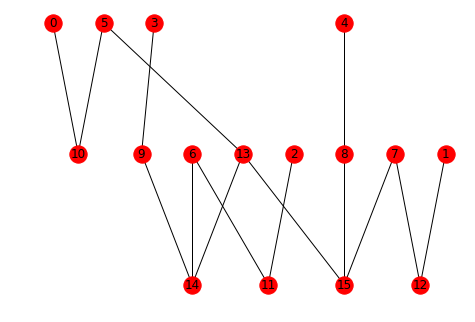

In [7]:
show_graph('./trees/graph_30698.mat')

In [8]:
from random import randint

# Generate random trees and burn them...
for i in range(100):
    n = randint(1, 125)
    rand_tree = nx.generators.trees.random_tree(n, seed=randint(0, 213218321321))
    burning_sequence = burn_tree(rand_tree)
    print('b(G)<={0:2d} | n={1:3d} | ceil(sqrt(n))={2:3d} | {3:20}'.format(len(burning_sequence),
                                                                     rand_tree.order(),
                                                                     math.ceil(math.sqrt(rand_tree.order())),
                                                                     str(burning_sequence)))
    if len(burning_sequence) > math.ceil(math.sqrt(rand_tree.order())):
        print("Burning sequence > sqrt(n)")
        pos = nx.nx_pydot.pydot_layout(rand_tree, prog='dot')
        nx.draw(rand_tree, pos=pos, with_labels=True)
    

b(G)<= 3 | n=  6 | ceil(sqrt(n))=  3 | [0, 4, 2]           
b(G)<= 9 | n=115 | ceil(sqrt(n))= 11 | [0, 28, 81, 108, 70, 67, 60, 42, 14]
b(G)<= 5 | n= 33 | ceil(sqrt(n))=  6 | [27, 18, 10, 7, 5]  
b(G)<= 5 | n= 22 | ceil(sqrt(n))=  5 | [0, 5, 16, 19, 15]  
b(G)<= 5 | n= 23 | ceil(sqrt(n))=  5 | [0, 17, 3, 14, 13]  
b(G)<= 7 | n= 86 | ceil(sqrt(n))= 10 | [3, 35, 7, 79, 44, 82, 45]
b(G)<= 6 | n= 41 | ceil(sqrt(n))=  7 | [0, 26, 27, 35, 9, 12]
b(G)<= 9 | n=115 | ceil(sqrt(n))= 11 | [76, 93, 97, 57, 39, 48, 26, 68, 73]
b(G)<=10 | n=107 | ceil(sqrt(n))= 11 | [87, 61, 76, 60, 94, 97, 75, 72, 62, 31]
b(G)<= 3 | n=  9 | ceil(sqrt(n))=  3 | [0, 2, 4]           
b(G)<= 9 | n=120 | ceil(sqrt(n))= 11 | [90, 6, 57, 20, 91, 85, 101, 111, 56]
b(G)<= 8 | n= 94 | ceil(sqrt(n))= 10 | [85, 40, 50, 69, 24, 21, 66, 52]
b(G)<= 6 | n= 44 | ceil(sqrt(n))=  7 | [12, 27, 13, 7, 10, 30]
b(G)<= 8 | n= 91 | ceil(sqrt(n))= 10 | [65, 7, 66, 72, 22, 82, 51, 71]
b(G)<= 7 | n= 57 | ceil(sqrt(n))=  8 | [0, 2, 48, 11, 42,

In [9]:
# Try burning all the trees in the ./trees directory
DIR_NAME = "./trees"
directory = os.fsencode(DIR_NAME)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".mat"):
        #print(filename)
        filepath = os.path.join(DIR_NAME, filename)
        with open(filepath, 'r') as file:
            adj_mat = create_adj_mat(filepath)
            tree = nx.convert_matrix.from_numpy_matrix(adj_mat)
            #pos = nx.nx_pydot.pydot_layout(tree, prog='dot')
            #nx.draw(tree, pos=pos, with_labels=True)
            
            burning_sequence = burn_tree_using_centers(tree, update_root=True)
            print('b(G)<={0:2d} | n={1:2d} | ceil(sqrt(n))={2:2d} | {3:15} | {4:20}'.format(len(burning_sequence),
                                                                     tree.order(),
                                                                     math.ceil(math.sqrt(tree.order())),
                                                                     filename,
                                                                     str(burning_sequence)))

b(G)<= 3 | n= 6 | ceil(sqrt(n))= 3 | cross.mat       | [3, 5, 0]           
b(G)<= 3 | n= 8 | ceil(sqrt(n))= 3 | ethane.mat      | [0, 7, 1]           
b(G)<= 3 | n= 5 | ceil(sqrt(n))= 3 | fork.mat        | [2, 4, 0]           
b(G)<= 5 | n=32 | ceil(sqrt(n))= 6 | graph_1028.mat  | [0, 28, 29, 23, 16] 
b(G)<= 4 | n=13 | ceil(sqrt(n))= 4 | graph_156.mat   | [5, 9, 12, 2]       
b(G)<= 4 | n=11 | ceil(sqrt(n))= 4 | graph_164.mat   | [0, 7, 9, 1]        
b(G)<= 4 | n=11 | ceil(sqrt(n))= 4 | graph_25135.mat | [4, 9, 5, 3]        
b(G)<= 7 | n=46 | ceil(sqrt(n))= 7 | graph_26981.mat | [24, 12, 28, 22, 13, 43, 1]
b(G)<= 3 | n=12 | ceil(sqrt(n))= 4 | graph_27412.mat | [10, 8, 5]          
b(G)<= 4 | n=16 | ceil(sqrt(n))= 4 | graph_28507.mat | [12, 15, 10, 6]     
b(G)<= 4 | n=16 | ceil(sqrt(n))= 4 | graph_30698.mat | [13, 5, 12, 2]      
b(G)<= 4 | n=12 | ceil(sqrt(n))= 4 | graph_352.mat   | [4, 6, 9, 0]        
b(G)<= 4 | n=14 | ceil(sqrt(n))= 4 | graph_356.mat   | [6, 10, 13, 3]      
b(G)<

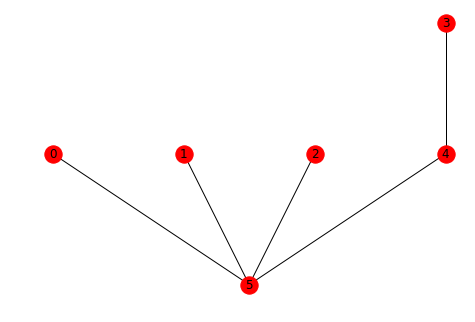

In [10]:
show_graph('./trees/cross.mat')

So far, seems like burning without updating the root with a central vertex is best. Burning example trees from the `/trees` directory, both give sequences that are always at most sqrt(n), but updating the root makes the sequence a bit longer in certain instances. From trying the original (no update) algorithm on random trees, some trees were found that took > sqrt(n) rounds to burn. Maybe updating with centers guarantees at most sqrt(n) rounds?

Iteration: 0
Updating root produces sequences taking at most sqrt(n) rounds while a fixed root does not.
Burning Sequence (no update): [0, 8, 7, 12, 6]
Burning Sequence (update root): [11, 12, 1, 2]


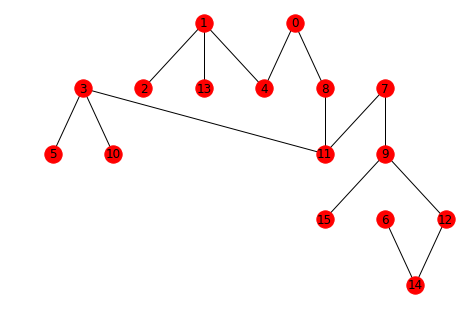

In [11]:
# Try to find a tree where updating the root produces a sequence that takes at 
# most sqrt(n) rounds, but not updating takes longer
i = 0
while True:   
    if i % 1000 == 0:
        print("Iteration:", i)
    n = randint(1, 125)
    rand_tree = nx.generators.trees.random_tree(n, seed=randint(0, 213218321321))
    burning_sequence = burn_tree(rand_tree)
    burning_sequence_update = burn_tree_using_centers(rand_tree, update_root=True)
    
    upper_bound = math.ceil(math.sqrt(rand_tree.order()))
    if len(burning_sequence_update) > upper_bound:
        print("Burning with updated root still can take > sqrt(n) rounds")
        print("Burning Sequence (no update):", burning_sequence)
        print("Burning Sequence (update root):", burning_sequence_update)
        pos = nx.nx_pydot.pydot_layout(rand_tree, prog='dot')
        nx.draw(rand_tree, pos=pos, with_labels=True)
        break
    elif len(burning_sequence) > upper_bound and len(burning_sequence_update) <= upper_bound:
        print("Updating root produces sequences taking at most sqrt(n) rounds while a fixed root does not.")
        print("Burning Sequence (no update):", burning_sequence)
        print("Burning Sequence (update root):", burning_sequence_update)
        pos = nx.nx_pydot.pydot_layout(rand_tree, prog='dot')
        nx.draw(rand_tree, pos=pos, with_labels=True)
        break
        
    i += 1
        

Iteration: 0
Burning with updated root still can take > sqrt(n) rounds
Burning Sequence (no update): [6, 3, 5]
Burning Sequence (update root): [1, 8, 4, 0]


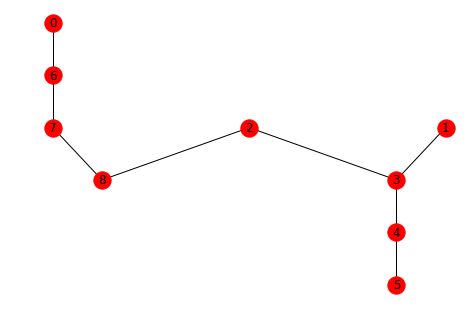

In [12]:
# Try to find a tree where updating the root produces a sequence that takes 
# more than sqrt(n) rounds to burn
i = 0
while True:   
    if i % 1000 == 0:
        print("Iteration:", i)
    n = randint(1, 125)
    rand_tree = nx.generators.trees.random_tree(n, seed=randint(0, 213218321321))
    burning_sequence = burn_tree(rand_tree)
    burning_sequence_update = burn_tree_using_centers(rand_tree, update_root=True)
    
    upper_bound = math.ceil(math.sqrt(rand_tree.order()))
    if len(burning_sequence_update) > upper_bound:
        print("Burning with updated root still can take > sqrt(n) rounds")
        print("Burning Sequence (no update):", burning_sequence)
        print("Burning Sequence (update root):", burning_sequence_update)
        pos = nx.nx_pydot.pydot_layout(rand_tree, prog='dot')
        nx.draw(rand_tree, pos=pos, with_labels=True)
        break
        
    i += 1
        

In [13]:
# Burn some random trees with both algorithms
for i in range(25):
    n = randint(1, 125)
    rand_tree = nx.generators.trees.random_tree(n, seed=randint(0, 213218321321))
    burning_sequence = burn_tree(rand_tree)
    burning_sequence_update = burn_tree_using_centers(rand_tree, update_root=True)
    print('Length (No Update/Update): {0:1d}/{1:1d} | n={2:3d} | ceil(sqrt(n))={3:3d} | {4:20}'.format(
        len(burning_sequence),
        len(burning_sequence_update),
        rand_tree.order(),
        math.ceil(math.sqrt(rand_tree.order())),
        str(burning_sequence))
    )
   

Length (No Update/Update): 9/8 | n=110 | ceil(sqrt(n))= 11 | [0, 25, 54, 36, 78, 79, 77, 38, 20]
Length (No Update/Update): 8/8 | n= 92 | ceil(sqrt(n))= 10 | [12, 10, 88, 69, 22, 86, 53, 61]
Length (No Update/Update): 8/9 | n=121 | ceil(sqrt(n))= 11 | [49, 47, 80, 98, 33, 52, 107, 29]
Length (No Update/Update): 9/9 | n=106 | ceil(sqrt(n))= 11 | [64, 13, 18, 30, 2, 5, 47, 90, 50]
Length (No Update/Update): 8/8 | n= 94 | ceil(sqrt(n))= 10 | [10, 56, 9, 72, 66, 31, 58, 14]
Length (No Update/Update): 7/7 | n= 75 | ceil(sqrt(n))=  9 | [34, 74, 72, 55, 69, 39, 17]
Length (No Update/Update): 3/3 | n=  7 | ceil(sqrt(n))=  3 | [4, 5, 3]           
Length (No Update/Update): 6/6 | n= 51 | ceil(sqrt(n))=  8 | [14, 5, 49, 20, 18, 45]
Length (No Update/Update): 9/9 | n=112 | ceil(sqrt(n))= 11 | [27, 37, 94, 50, 19, 77, 73, 46, 105]
Length (No Update/Update): 8/9 | n= 98 | ceil(sqrt(n))= 10 | [0, 25, 93, 83, 49, 29, 63, 18]
Length (No Update/Update): 8/9 | n=107 | ceil(sqrt(n))= 11 | [2, 69, 67, 65,

### Conclusion

sometimes updating root gives a better sequence, and sometimes using fixed root gives a better sequence. Both almost always give sequences of length <= sqrt(n), but both can sometimes give longer sequences.

Iteration: 0
Iteration: 1000
Iteration: 2000
Iteration: 3000
n=16, sqrt(n)=
Burning Sequence (no update): [0, 6, 11, 5, 2]
Burning Sequence (update root): [1, 8, 9, 5, 2]


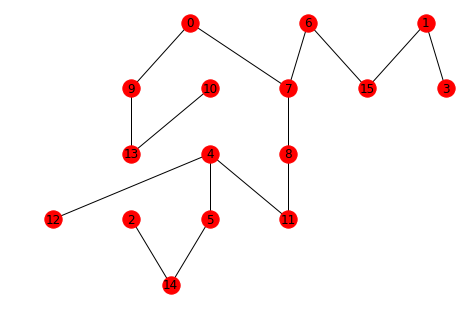

In [14]:
# Find a tree that takes > sqrt(n) on both algorithms?
i = 0
while True:   
    if i % 1000 == 0:
        print("Iteration:", i)
    n = randint(1, 125)
    rand_tree = nx.generators.trees.random_tree(n, seed=randint(0, 213218321321))
    burning_sequence = burn_tree(rand_tree)
    burning_sequence_update = burn_tree_using_centers(rand_tree, update_root=True)
    
    upper_bound = math.ceil(math.sqrt(rand_tree.order()))
    if len(burning_sequence_update) > upper_bound and len(burning_sequence) > upper_bound:
        print("n={}, sqrt(n)=".format(rand_tree.order(), math.ceil(math.sqrt(rand_tree.order()))))
        print("Burning Sequence (no update):", burning_sequence)
        print("Burning Sequence (update root):", burning_sequence_update)
        pos = nx.nx_pydot.pydot_layout(rand_tree, prog='dot')
        nx.draw(rand_tree, pos=pos, with_labels=True)
        break
        
    i += 1

Maybe for any given tree, there is some vertex such that if we root the tree there, the algorithm will return a burning sequence of length at most sqrt(n)?


Iteration: 0
Iteration: 1000
Iteration: 2000
Iteration: 3000
Iteration: 4000
Iteration: 5000
Iteration: 6000
Iteration: 7000
Iteration: 8000
Iteration: 9000
Iteration: 10000
Iteration: 11000
Iteration: 12000
Iteration: 13000
Iteration: 14000
Iteration: 15000
Iteration: 16000
Iteration: 17000
Iteration: 18000
Iteration: 19000
Iteration: 20000
Iteration: 21000
Iteration: 22000
Iteration: 23000
Iteration: 24000
Iteration: 25000
Iteration: 26000
Iteration: 27000
Iteration: 28000
Iteration: 29000
Iteration: 30000
Iteration: 31000
Iteration: 32000
Iteration: 33000
Iteration: 34000
Iteration: 35000
Iteration: 36000
Iteration: 37000
Iteration: 38000
Iteration: 39000
Iteration: 40000
Iteration: 41000
Iteration: 42000
Iteration: 43000
Iteration: 44000
Iteration: 45000
Iteration: 46000
Iteration: 47000
Iteration: 48000
Iteration: 49000
Iteration: 50000
Iteration: 51000
Iteration: 52000
Iteration: 53000
Iteration: 54000
Iteration: 55000
Iteration: 56000
Iteration: 57000
Iteration: 58000
Iteration:

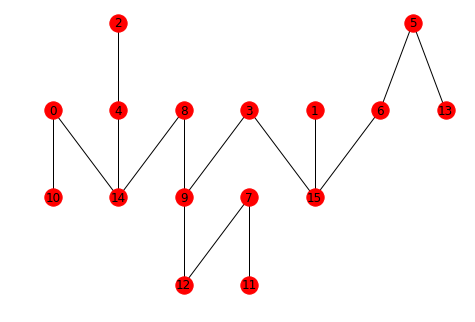

In [18]:
i = 0
while True:   
    if i % 1000 == 0:
        print("Iteration:", i)
    n = randint(1, 125)
    rand_tree = nx.generators.trees.random_tree(n, seed=randint(0, 213218321321))
    
    satisfied = False
    for root in range(n):
        burning_sequence = burn_tree(rand_tree, root)
        upper_bound = math.ceil(math.sqrt(rand_tree.order()))
        
        if len(burning_sequence) <= upper_bound:
            satisfied = True
            break
    
    if not satisfied:
        print("Found tree for which burn_tree does not give a sequence of length <= sqrt(n) for any root.")
        print("n={}, sqrt(n)={}".format(rand_tree.order(), math.ceil(math.sqrt(rand_tree.order()))))
        pos = nx.nx_pydot.pydot_layout(rand_tree, prog='dot')
        nx.draw(rand_tree, pos=pos, with_labels=True)
        break
        
    i += 1

In [29]:
found = 0
while found < 50:   
    n = randint(1, 125)
    rand_tree = nx.generators.trees.random_tree(n, seed=randint(0, 213218321321))

    burning_sequence = burn_tree(rand_tree, 0)
    upper_bound = math.ceil(math.sqrt(rand_tree.order()))
        
    if len(burning_sequence) > upper_bound:
        found += 1  
        print('b(G)<={0:2d} | n={1:2d} | ceil(sqrt(n))={2:2d}'.format(len(burning_sequence),
                                                                     rand_tree.order(),
                                                                     math.ceil(math.sqrt(rand_tree.order()))))

b(G)<= 7 | n=36 | ceil(sqrt(n))= 6
b(G)<= 5 | n=15 | ceil(sqrt(n))= 4
b(G)<= 7 | n=35 | ceil(sqrt(n))= 6
b(G)<= 7 | n=36 | ceil(sqrt(n))= 6
b(G)<= 5 | n=16 | ceil(sqrt(n))= 4
b(G)<= 4 | n= 9 | ceil(sqrt(n))= 3
b(G)<= 4 | n= 9 | ceil(sqrt(n))= 3
b(G)<= 7 | n=33 | ceil(sqrt(n))= 6
b(G)<= 6 | n=24 | ceil(sqrt(n))= 5
b(G)<= 4 | n= 9 | ceil(sqrt(n))= 3
b(G)<= 6 | n=25 | ceil(sqrt(n))= 5
b(G)<= 7 | n=36 | ceil(sqrt(n))= 6
b(G)<= 4 | n= 9 | ceil(sqrt(n))= 3
b(G)<= 6 | n=24 | ceil(sqrt(n))= 5
b(G)<= 6 | n=25 | ceil(sqrt(n))= 5
b(G)<= 6 | n=25 | ceil(sqrt(n))= 5
b(G)<= 4 | n= 9 | ceil(sqrt(n))= 3
b(G)<= 6 | n=25 | ceil(sqrt(n))= 5
b(G)<= 6 | n=25 | ceil(sqrt(n))= 5
b(G)<= 5 | n=16 | ceil(sqrt(n))= 4
b(G)<= 4 | n= 9 | ceil(sqrt(n))= 3
b(G)<= 4 | n= 9 | ceil(sqrt(n))= 3
b(G)<= 5 | n=16 | ceil(sqrt(n))= 4
b(G)<= 5 | n=16 | ceil(sqrt(n))= 4
b(G)<= 5 | n=14 | ceil(sqrt(n))= 4
b(G)<= 7 | n=32 | ceil(sqrt(n))= 6
b(G)<= 5 | n=15 | ceil(sqrt(n))= 4
b(G)<= 5 | n=16 | ceil(sqrt(n))= 4
b(G)<= 4 | n= 9 | ce

From above, seems like bound for the length of a burning sequence returned by `burn_tree` is sqrt(n) + 1.